# Description

To examine whether Malaysia election votes exhibits Benford's law distribution.  

# Modules and Initialization

In [1]:
import pandas as pd
from benfordslaw import benfordslaw
from matplotlib import pyplot as plt
import datetime

In [2]:
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
# Note that this data is downloaded from
# https://www.kaggle.com/datasets/terenctb/malaysia-ge14-election-results-parliament
state_df = pd.read_csv('./data/Election-Results-2018 - State_Results_By_Candidate.csv')
parlimen_df = pd.read_csv('./data/Election-Results-2018 - Parlimen_Results_By_Candidate.csv') 

In [4]:
def fix_int(value):
    try:
        value = int(value.replace(',', ''))
        return value
    except:
        return 0
    
state_df['Votes for Candidate2'] = state_df['Votes for Candidate'].apply(lambda x: fix_int(x))
parlimen_df['Votes for Candidate2'] = parlimen_df['Votes for Candidate'].apply(lambda x: fix_int(x))


In [5]:
state_df.sample(4)

,State,Seat ID,Seat Name,Candidate Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan,Votes for Candidate2
1261,Selangor,N.46,PELABUHAN KLANG,KHALID BIN NAYAN,PAS,"2,925","28,305",10.33%,0,L,HD,AHLI PERNIAGAAN,2925
816,Pulau Pinang,N.20,SUNGAI BAKAP,DR AMAR PRITPAL BIN ABDULLAH,PKR,"10,386","22,795",45.56%,1,L,MNG,0,10386
879,Pulau Pinang,N.37,BATU MAUNG,SAIFUL LIZAN BIN MD YUSOFF,PAS,"3,153","29,596",10.65%,0,L,HD,0,3153
292,Kelantan,N.07,PANCHOR,DATO' NIK AMAR,PAS,"13,597","22,300",60.97%,1,L,MNG,TIMBALAN MENTERI BESAR SEMENTARA,13597


In [6]:
parlimen_df.sample(4)

,Seat ID,Seat Name,Candidate Name,Candidate Party,Coalition,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan,Votes for Candidate2
409,P.131,REMBAU,LT KOL ROSELI BIN ABDUL GANI (B),PKR,Harapan,"31,732","73,856",42.96%,0,L,KLH,0,31732
280,P.091,ROMPIN,SITARUNISAH BINTI AB KADIR,PKR,Harapan,"7,876","49,737",15.84%,0,P,KLH,BERNIAGA,7876
643,P.204,BETONG,ROBERT LAWSON CHUAT,BN,BN,"12,517","20,720",60.41%,1,L,MNG,AHLI PERNIAGAAN,12517
333,P.107,SUNGAI BULOH,A. PRAKASH RAO,BN,BN,"16,681","77,951",21.40%,0,L,KLH,TIADA,16681


# State Results By Candidate

In [7]:
state_df['Candidate Party'].value_counts()[:5]


BN         505
PKR        448
PAS        393
WARISAN     45
PRM         33
Name: Candidate Party, dtype: int64

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=2.78409e-48, Tstat=244.298


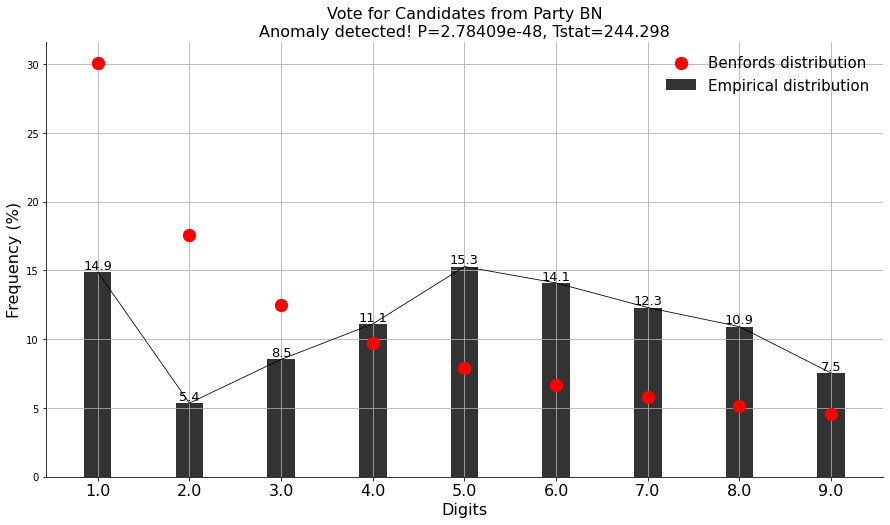

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.30373, Tstat=9.47618


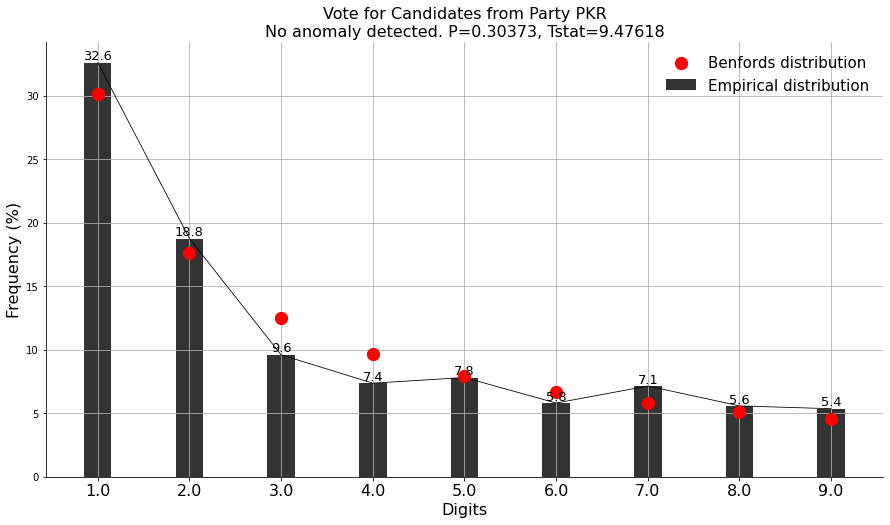

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.00307555, Tstat=23.2348


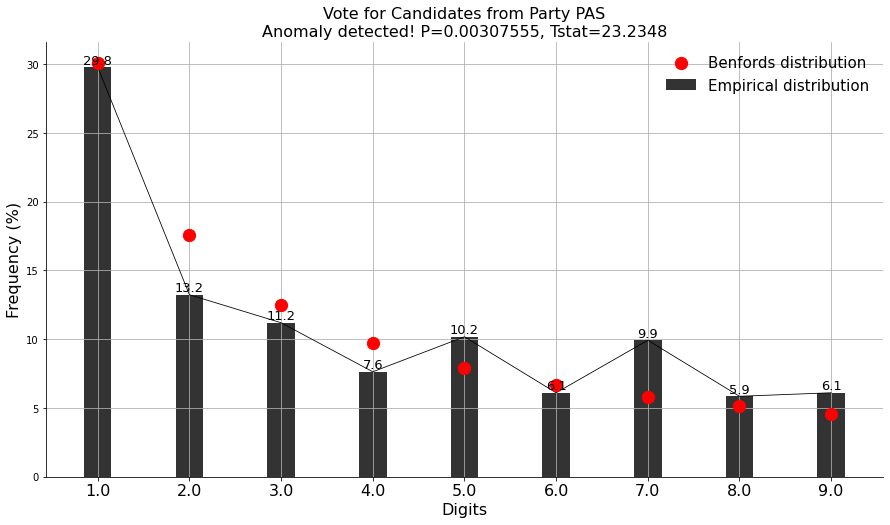

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.537353, Tstat=6.99333


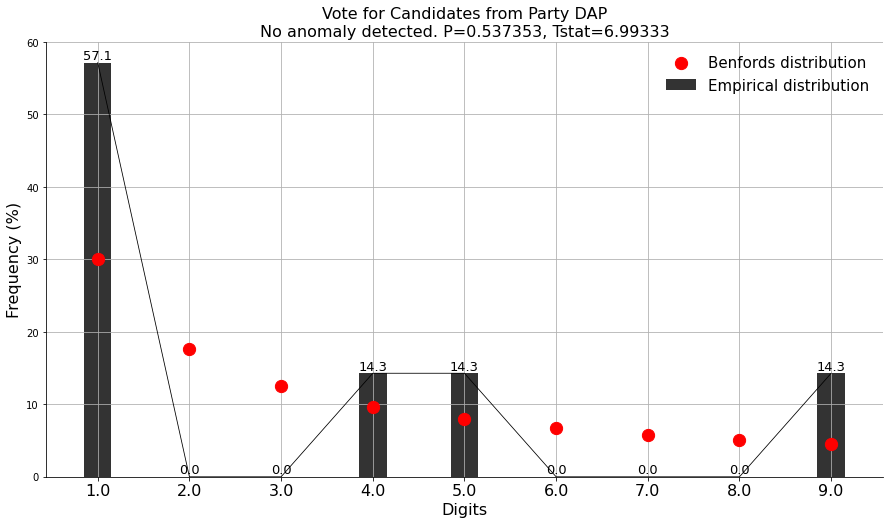

In [8]:
party_list = ['BN', 'PKR', 'PAS', 'DAP']

for party in party_list:
    bl = benfordslaw()
    mask = state_df['Candidate Party'] == party
    results = bl.fit(state_df[mask]['Votes for Candidate2'])

    fig, ax =  bl.plot(title=f'Vote for Candidates from Party {party}');
    plt.show()

# Parlimen Results by Candidates

In [9]:
parlimen_df['Coalition'].value_counts()

Harapan    226
BN         222
PAS        158
BEBAS       81
Name: Coalition, dtype: int64

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.349208, Tstat=8.91861


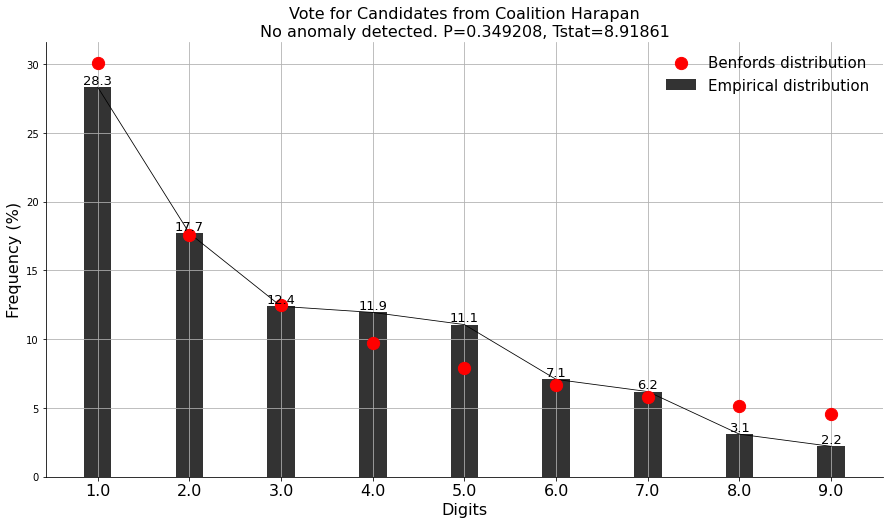

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=9.7951e-23, Tstat=122.563


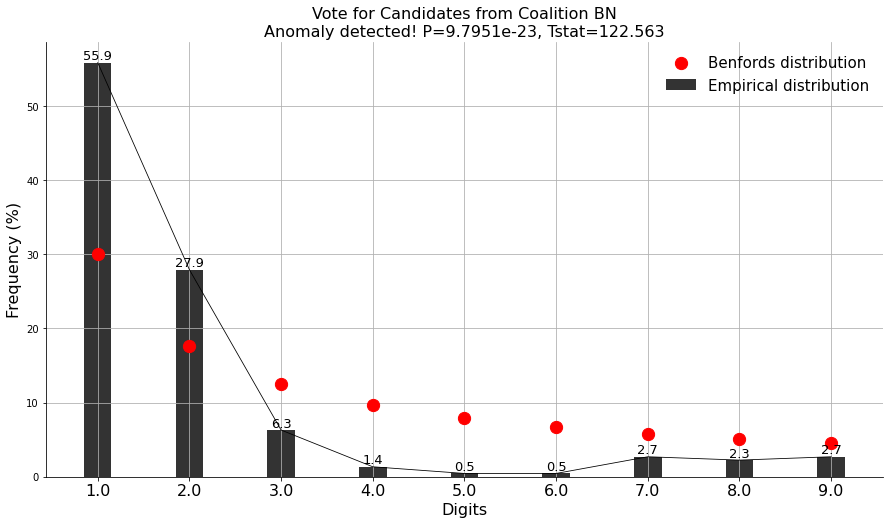

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.753919, Tstat=5.03416


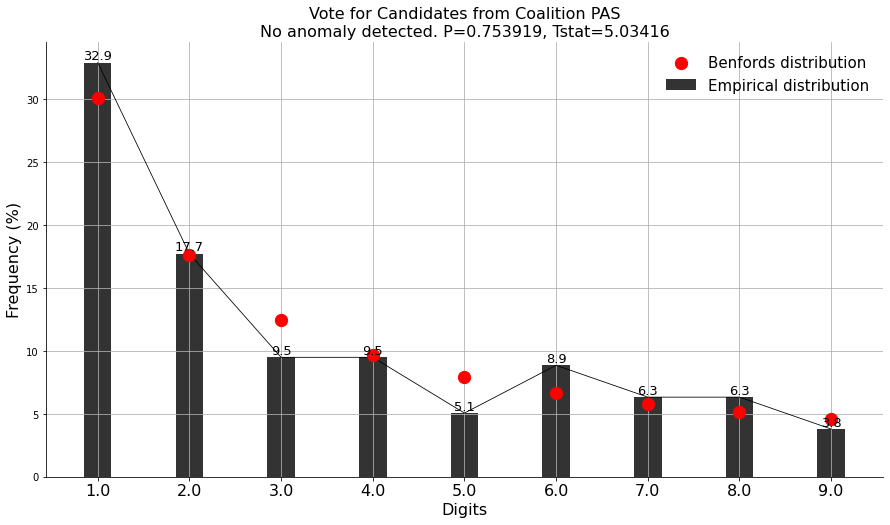

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.883667, Tstat=3.69347


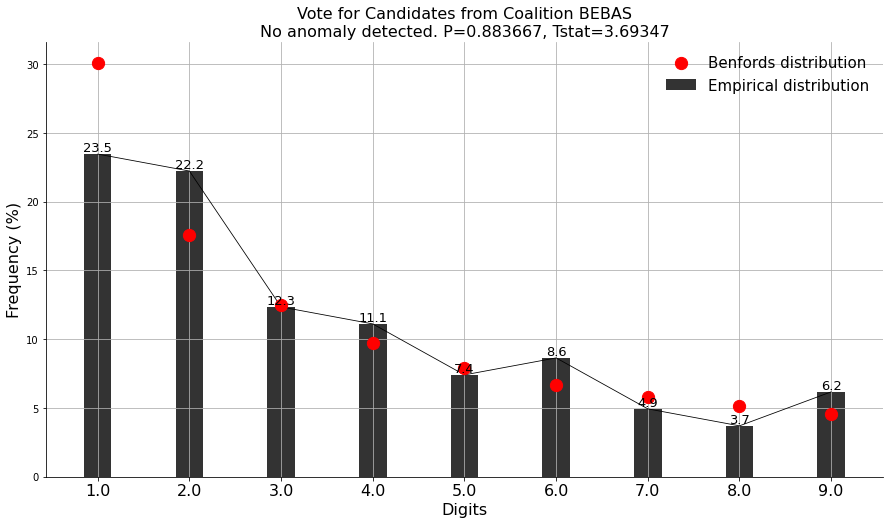

In [10]:
coalition_list = ['Harapan', 'BN', 'PAS', 'BEBAS']

for coalition in coalition_list:
    bl = benfordslaw()
    mask = parlimen_df['Coalition'] == coalition
    results = bl.fit(parlimen_df[mask]['Votes for Candidate2'])

    fig, ax =  bl.plot(title=f'Vote for Candidates from Coalition {coalition}');
    plt.show()

# Completion

In [11]:
print(f'Completed at UTC time: {datetime.datetime.utcnow()}')

Completed at UTC time: 2022-08-13 16:04:56.880649
